In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
print(sitk.Version())

SimpleITK Version: 1.1.0rc2 (ITK 4.13)
Compiled: Mar  7 2018 16:47:58



In [3]:
# Import t2 nifti file
root_dir = Path.cwd().parent
t2_path = root_dir.joinpath('nifti/ProstateX-0002/t2/4_t2_tse_tra.nii.gz')
t2_original = sitk.ReadImage(str(t2_path))

In [4]:
# Convert to numpy array
t2_original_np = sitk.GetArrayFromImage(t2_original)

# Get a slice of the array (10th slice)
t2_slice_original = t2_original_np[9,:,:]

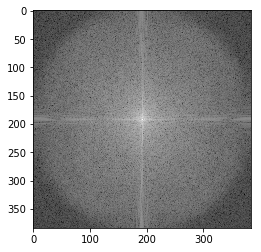

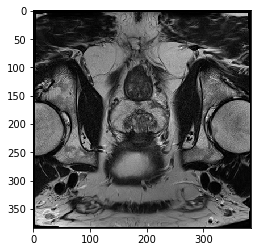

In [5]:
# take 2DFFT of image
ft_t2_slice = np.fft.fft2(t2_slice_original)
ft_t2_slice = np.fft.fftshift(ft_t2_slice)
plt.imshow(np.log(np.abs(ft_t2_slice)), cmap = 'gray')
plt.show()

# bring it back
ift_t2_slice = np.fft.ifft2(ft_t2_slice)
plt.imshow(np.abs(ift_t2_slice), cmap = 'gray')
plt.show()

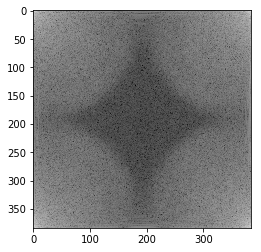

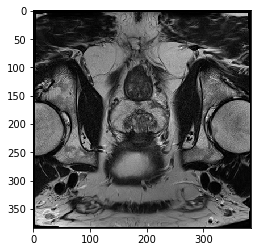

In [6]:
# take 2DFFT of image - no shift to centre
ftns_t2_slice = np.fft.fft2(t2_slice_original)
plt.imshow(np.log(np.abs(ftns_t2_slice)), cmap = 'gray')
plt.show()

# bring it back
iftns_t2_slice = np.fft.ifft2(ftns_t2_slice)
plt.imshow(np.abs(iftns_t2_slice), cmap = 'gray')
plt.show()

## 2c. Laplacian (high pass- edge detection) filter in the frequency domain

Sources: 

- [OpenCV Tutorial](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
- [SciPy Tutorial](https://scipython.com/book/chapter-6-numpy/examples/blurring-an-image-with-a-two-dimensional-fft/)
- [Applying Filters in Frequency domain](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Signal_Processing_with_NumPy_Fourier_Transform_FFT_DFT_2.php)

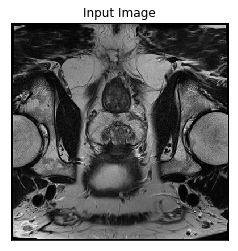

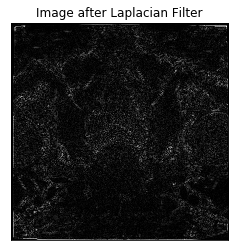

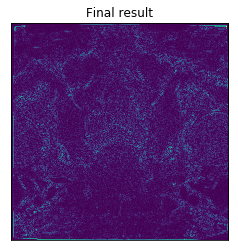

In [7]:
laplacian = np.array([[0, 10, 0],                   # Create laplacian
                      [10,-40, 10],
                      [0, 10, 0]])

fft_laplacian = np.fft.fft2(laplacian, (384,384))   # take 2D FFT of laplacian filter
fft_laplacian = np.fft.fftshift(fft_laplacian)      # shift the centre

ft_t2_slice = np.fft.fft2(t2_slice_original)        # take 2D FFT of image
ft_t2_slice = np.fft.fftshift(ft_t2_slice)          # shift the centre
ft_t2_slice = ft_t2_slice * fft_laplacian           # apply filter
ft_t2_slice = np.fft.fftshift(ft_t2_slice)          # shift back

t2_slice_edges = np.fft.ifft2(ft_t2_slice)          # bring image back
t2_slice_edges = np.abs(t2_slice_edges)


plt.imshow(t2_slice_original, cmap = 'gray')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(t2_slice_edges, cmap = 'gray')
plt.title('Image after Laplacian Filter')
plt.xticks([])
plt.yticks([])
plt.show()

plt.imshow(t2_slice_edges)
plt.title('Final result')
plt.xticks([])
plt.yticks([])
plt.show()
